# Membaca data training dari file eksternal.

In [12]:
import pandas as pd

#PEMBACAAN DATASET CENSUS
X = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])
print("Overview data:")
print(X.head())
target = X["50K"]
print("\n\nTARGET: ")
print(target.head())

census = X[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]


print("\n\nDATA: ")
print(census.head())
print()


Overview data:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country     50K  
0          2174             0              40   Unite

# Melakukan training dengan algoritma pembelajaran KNN


In [27]:
#Training dengan KNN , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#iris = datasets.load_iris()

#PEMBACAAN DATASET CENSUS
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None,na_values=["?"], names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])
    
#changing missing value into mode
cen["workclass"]=cen["workclass"].fillna(mode(cen["workclass"]))
cen["education"]=cen["education"].fillna(mode(cen["education"]))
cen["marital-status"]=cen["marital-status"].fillna(mode(cen["marital-status"]))
cen["occupation"]=cen["occupation"].fillna(mode(cen["occupation"]))
cen["relationship"]=cen["relationship"].fillna(mode(cen["relationship"]))
cen["race"]=cen["race"].fillna(mode(cen["race"]))
cen["sex"]=cen["sex"].fillna(mode(cen["sex"]))
cen["native-country"]=cen["native-country"].fillna(mode(cen["native-country"]))
    
census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]


#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == " <=50K"):
        new.append(0.0)
    else:
        if(item == " >50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
new_data = new_data.values


split_number = 10

#folding
kf = KFold(n_splits=split_number,shuffle= True)
test = kf.split(new_data)
jumlah = 0;
nomorFold = 1
for train_index,test_index in test:
    data_train,data_test = new_data[train_index],new_data[test_index]
    target_train,target_test = new[train_index], new[test_index]
    
    #learning dataset
    knn = KNeighborsClassifier(n_neighbors = 21,p=1)
    knn.fit(data_train,target_train)
    print("fold ke: ",nomorFold)
    #predicting learning data 
    prediction = knn.predict(data_test)
    print('PREDICTION: ',prediction)
    print('TARGET TEST : ',target_test)
    
    #generating confusion matrix
    #conf_matrix = 
    conf = confusion_matrix(target_test,prediction)
    print('Confusion Matrix:')
    print(conf)
    
    #accuracy
    print('\nAccuracy:')
    acc = accuracy_score(target_test,prediction)
    jumlah+=acc
    print(acc*100, "%")
    
    #precision
    print('\nPrecission:')
    prec = precision_score(target_test,prediction)
    print(prec)
    
    #recall
    print('\nRecall:')
    rec = recall_score(target_test,prediction)
    print(rec)
    print('\n')
    nomorFold+=1
    
average = jumlah/10;
print('Rata-rata accuracy: ',average*100,'%\n')

fold ke:  1
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  1.  1. ...,  0.  0.  1.]
Confusion Matrix:
[[2424   43]
 [ 615  175]]

Accuracy:
79.7973595333 %

Precission:
0.802752293578

Recall:
0.221518987342


fold ke:  2
PREDICTION:  [ 1.  0.  0. ...,  0.  0.  1.]
TARGET TEST :  [ 1.  0.  0. ...,  0.  1.  1.]
Confusion Matrix:
[[2441   44]
 [ 598  173]]

Accuracy:
80.2825552826 %

Precission:
0.797235023041

Recall:
0.224383916991


fold ke:  3
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  0.]
Confusion Matrix:
[[2444   31]
 [ 604  177]]

Accuracy:
80.4975429975 %

Precission:
0.850961538462

Recall:
0.226632522407


fold ke:  4
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  1.  0.]
Confusion Matrix:
[[2405   44]
 [ 629  178]]

Accuracy:
79.3304668305 %

Precission:
0.801801801802

Recall:
0.220570012392


fold ke:  5
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,

# Melakukan training dengan algoritma pembelajaran Naive Bayes


In [28]:
#Training dengan Naive Bayes , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#PEMBACAAN DATASET CENSUS
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None, na_values=["?"], names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])

#changing missing value into mode
cen["workclass"]=cen["workclass"].fillna(mode(cen["workclass"]))
cen["education"]=cen["education"].fillna(mode(cen["education"]))
cen["marital-status"]=cen["marital-status"].fillna(mode(cen["marital-status"]))
cen["occupation"]=cen["occupation"].fillna(mode(cen["occupation"]))
cen["relationship"]=cen["relationship"].fillna(mode(cen["relationship"]))
cen["race"]=cen["race"].fillna(mode(cen["race"]))
cen["sex"]=cen["sex"].fillna(mode(cen["sex"]))
cen["native-country"]=cen["native-country"].fillna(mode(cen["native-country"]))

census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]


#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == " <=50K"):
        new.append(0.0)
    else:
        if(item == " >50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
new_data = new_data.values


split_number = 10

#folding
kf = KFold(n_splits=split_number,shuffle= True)
jumlah = 0
nomorFold = 1
for train_index,test_index in kf.split(new_data):
    data_train,data_test = new_data[train_index],new_data[test_index]
    target_train,target_test = new[train_index], new[test_index]
    
    #learning dataset    
    gnb = GaussianNB()
    gnb.fit(data_train,target_train)
    print("fold ke: ",nomorFold)
    #predicting learning data 
    prediction = gnb.predict(data_test)
    print('PREDICTION: ',prediction)
    print('TARGET TEST : ',target_test)
    
    #generating confusion matrix
    #conf_matrix = 
    conf = confusion_matrix(target_test,prediction)
    print('Confusion Matrix:')
    print(conf)
    
    #accuracy
    print('\nAccuracy:')
    acc = accuracy_score(target_test,prediction)
    jumlah+=acc
    print(acc*100,'%')
    
    #precision
    print('\nPrecission:')
    prec = precision_score(target_test,prediction)
    print(prec)
    
    #recall
    print('\nRecall:')
    rec = recall_score(target_test,prediction)
    print(rec)
    print('\n')
    nomorFold+=1
    
average = jumlah/10;
print('Rata-rata accuracy: ',average*100,'%\n')

fold ke:  1
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  1.  0.  0.]
Confusion Matrix:
[[2319  134]
 [ 569  235]]

Accuracy:
78.4157199877 %

Precission:
0.636856368564

Recall:
0.292288557214


fold ke:  2
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  1. ...,  0.  1.  0.]
Confusion Matrix:
[[2363  139]
 [ 514  240]]

Accuracy:
79.9447174447 %

Precission:
0.633245382586

Recall:
0.318302387268


fold ke:  3
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  0.]
Confusion Matrix:
[[2316  141]
 [ 543  256]]

Accuracy:
78.9926289926 %

Precission:
0.64483627204

Recall:
0.320400500626


fold ke:  4
PREDICTION:  [ 0.  1.  0. ...,  0.  1.  0.]
TARGET TEST :  [ 0.  1.  1. ...,  0.  1.  1.]
Confusion Matrix:
[[2353  135]
 [ 567  201]]

Accuracy:
78.4398034398 %

Precission:
0.598214285714

Recall:
0.26171875


fold ke:  5
PREDICTION:  [ 0.  1.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  1.  0. ...,  0. 

# Melakukan training dengan algoritma pembelajaran Decision Tree


In [29]:
#Training dengan Decision Tree , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn import tree
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#PEMBACAAN DATASET CENSUS
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None,na_values=["?"], names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])

#changing missing value into mode
cen["workclass"]=cen["workclass"].fillna(mode(cen["workclass"]))
cen["education"]=cen["education"].fillna(mode(cen["education"]))
cen["marital-status"]=cen["marital-status"].fillna(mode(cen["marital-status"]))
cen["occupation"]=cen["occupation"].fillna(mode(cen["occupation"]))
cen["relationship"]=cen["relationship"].fillna(mode(cen["relationship"]))
cen["race"]=cen["race"].fillna(mode(cen["race"]))
cen["sex"]=cen["sex"].fillna(mode(cen["sex"]))
cen["native-country"]=cen["native-country"].fillna(mode(cen["native-country"]))


census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]


#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == " <=50K"):
        new.append(0.0)
    else:
        if(item == " >50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
new_data = new_data.values


split_number = 10

#folding
kf = KFold(n_splits=split_number,shuffle= True)
jumlah=0
nomorFold = 1
for train_index,test_index in kf.split(new_data):
    data_train,data_test = new_data[train_index],new_data[test_index]
    target_train,target_test = new[train_index], new[test_index]
    
    #learning dataset    
    clf = tree.DecisionTreeClassifier(criterion = "entropy",max_depth=10)
    clf.fit(data_train,target_train)
    print("fold ke ",nomorFold)
    #predicting learning data 
    prediction = clf.predict(data_test)
    print('PREDICTION: ',prediction)
    print('TARGET TEST : ',target_test)
    
    #generating confusion matrix
    #conf_matrix = 
    conf = confusion_matrix(target_test,prediction)
    print('Confusion Matrix:')
    print(conf)
    
    #accuracy
    print('\nAccuracy:')
    acc = accuracy_score(target_test,prediction)
    jumlah+=acc
    print(acc*100,'%')
    
    #precision
    print('\nPrecission:')
    prec = precision_score(target_test,prediction)
    print(prec)
    
    #recall
    print('\nRecall:')
    rec = recall_score(target_test,prediction)
    print(rec)
    print('\n')
    nomorFold+=1

average = jumlah/10;
print('Rata-rata accuracy: ',average*100,'%\n')

fold ke  1
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  0. ...,  0.  0.  0.]
Confusion Matrix:
[[2325  104]
 [ 409  419]]

Accuracy:
84.2493091802 %

Precission:
0.801147227533

Recall:
0.506038647343


fold ke  2
PREDICTION:  [ 1.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  1. ...,  0.  0.  0.]
Confusion Matrix:
[[2342  150]
 [ 303  461]]

Accuracy:
86.0872235872 %

Precission:
0.754500818331

Recall:
0.603403141361


fold ke  3
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  1.]
TARGET TEST :  [ 0.  0.  1. ...,  0.  0.  1.]
Confusion Matrix:
[[2336  119]
 [ 348  453]]

Accuracy:
85.6572481572 %

Precission:
0.791958041958

Recall:
0.565543071161


fold ke  4
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  1.  1. ...,  0.  0.  0.]
Confusion Matrix:
[[2358  107]
 [ 320  471]]

Accuracy:
86.8857493857 %

Precission:
0.814878892734

Recall:
0.595448798989


fold ke  5
PREDICTION:  [ 0.  1.  1. ...,  0.  1.  0.]
TARGET TEST :  [ 0.  1.  1. ...,  0. 

# Melakukan training dengan algoritma pembelajaran Multilayer Perceptron


In [24]:
#Training dengan MLP , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#PEMBACAAN DATASET CENSUS
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None,na_values=["?"], names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])

#changing missing value into mode
cen["workclass"]=cen["workclass"].fillna(mode(cen["workclass"]))
cen["education"]=cen["education"].fillna(mode(cen["education"]))
cen["marital-status"]=cen["marital-status"].fillna(mode(cen["marital-status"]))
cen["occupation"]=cen["occupation"].fillna(mode(cen["occupation"]))
cen["relationship"]=cen["relationship"].fillna(mode(cen["relationship"]))
cen["race"]=cen["race"].fillna(mode(cen["race"]))
cen["sex"]=cen["sex"].fillna(mode(cen["sex"]))
cen["native-country"]=cen["native-country"].fillna(mode(cen["native-country"]))

census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]




#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == " <=50K"):
        new.append(0.0)
    else:
        if(item == " >50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
new_data = new_data.values


split_number = 10

#folding
kf = KFold(n_splits=split_number,shuffle= True)
jumlah = 0
nomorFold = 1
for train_index,test_index in kf.split(new_data):
    data_train,data_test = new_data[train_index],new_data[test_index]
    target_train,target_test = new[train_index], new[test_index]
    
    #learning dataset    
    clf = MLPClassifier(activation='logistic',max_iter = 1000,solver='lbfgs',hidden_layer_sizes=(50,2),verbose=True)
    clf.fit(data_train,target_train)
    print("fold ke: ",nomorFold)
    #predicting learning data 
    prediction = clf.predict(data_test)
    print('PREDICTION: ',prediction)
    print('TARGET TEST : ',target_test)
    
    #generating confusion matrix
    #conf_matrix = 
    conf = confusion_matrix(target_test,prediction)
    print('Confusion Matrix:')
    print(conf)
    
    #accuracy
    print('\nAccuracy:')
    acc = accuracy_score(target_test,prediction)
    jumlah+=acc
    print(acc*100,'%')
    
    #precision
    print('\nPrecission:')
    prec = precision_score(target_test,prediction)
    print(prec)
    
    #recall
    print('\nRecall:')
    rec = recall_score(target_test,prediction)
    print(rec)
    print('\n')
    nomorFold+=1

average = jumlah/10;
print('Rata-rata accuracy: ',average*100,'%\n')

fold ke:  1
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  0.]
Confusion Matrix:
[[2284  128]
 [ 609  236]]

Accuracy:
77.3718145533 %

Precission:
0.648351648352

Recall:
0.279289940828


fold ke:  2
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  0.]
Confusion Matrix:
[[2479   15]
 [ 620  142]]

Accuracy:
80.4975429975 %

Precission:
0.904458598726

Recall:
0.186351706037


fold ke:  3
PREDICTION:  [ 1.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  0. ...,  0.  0.  1.]
Confusion Matrix:
[[2441   45]
 [ 623  147]]

Accuracy:
79.484029484 %

Precission:
0.765625

Recall:
0.190909090909


fold ke:  4
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  1. ...,  1.  1.  1.]
Confusion Matrix:
[[2458    0]
 [ 798    0]]

Accuracy:
75.4914004914 %

Precission:
0.0

Recall:
0.0




/home/dicky/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


fold ke:  5
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  1.  1.  0.]
Confusion Matrix:
[[2479    0]
 [ 777    0]]

Accuracy:
76.1363636364 %

Precission:
0.0

Recall:
0.0


fold ke:  6
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  1. ...,  0.  0.  0.]
Confusion Matrix:
[[2453   28]
 [ 625  150]]

Accuracy:
79.9447174447 %

Precission:
0.842696629213

Recall:
0.193548387097


fold ke:  7
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  1.]
Confusion Matrix:
[[2396   12]
 [ 728  120]]

Accuracy:
77.2727272727 %

Precission:
0.909090909091

Recall:
0.141509433962


fold ke:  8
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  1.]
TARGET TEST :  [ 1.  0.  1. ...,  0.  0.  1.]
Confusion Matrix:
[[2393  113]
 [ 557  193]]

Accuracy:
79.4226044226 %

Precission:
0.630718954248

Recall:
0.257333333333


fold ke:  9
PREDICTION:  [ 1.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  0.]
Confusio

# Melakukan full training dengan algoritma pembelajaran Decision Tree
### (Menghasilkan model ke file eksternal)


In [44]:
#Training dengan Decision Tree, metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn import tree
import pandas as pd
from sklearn.externals import joblib
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from statistics import mode

#PEMBACAAN DATASET CENSUS UNTUK TRAINING
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",\s",header=None,na_values=["?"], names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"], engine='python')

#add & uncomment these two if you want to ignore the ? value
#, na_values=["?"]
#cen.dropna(inplace=True)

#changing missing value into mode
cen["workclass"]=cen["workclass"].fillna(mode(cen["workclass"]))
cen["education"]=cen["education"].fillna(mode(cen["education"]))
cen["marital-status"]=cen["marital-status"].fillna(mode(cen["marital-status"]))
cen["occupation"]=cen["occupation"].fillna(mode(cen["occupation"]))
cen["relationship"]=cen["relationship"].fillna(mode(cen["relationship"]))
cen["race"]=cen["race"].fillna(mode(cen["race"]))
cen["sex"]=cen["sex"].fillna(mode(cen["sex"]))
cen["native-country"]=cen["native-country"].fillna(mode(cen["native-country"]))

census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]




#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == "<=50K"):
        new.append(0.0)
    else:
        if(item == ">50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
list_census = (list(new_data.columns.values))
print("new data:\n")
print(new_data)
new_data = new_data.values



#learning dataset    
clf = tree.DecisionTreeClassifier(criterion = "entropy",max_depth=10)
clf.fit(new_data,new)

print(clf)

joblib.dump(clf,'clf.pkl') # menyimpan model ke file eksternal
print('Model Saved!')

huehue = joblib.load('clf.pkl') # membaca model dari file eksternal
print('Model Loaded!')
print(huehue)

print(new_data)

new data:

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
5       37  284582             14             0             0              40   
6       49  160187              5             0             0              16   
7       52  209642              9             0             0              45   
8       31   45781             14         14084             0              50   
9       42  159449             13          5178             0              40   
10      37  280464             10             0             0              80   
11      30  14129

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Model Saved!
Model Loaded!
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[    39  77516     13 ...,      1      0      0]
 [    50  83311     13 ...,      1      0      0]
 [    38 215646      9 ...,      1      0      0]
 ..., 
 [    58 151910      9 ...,      1      0      0]
 [    22 201490      9 ...,      1      0      0]
 [    52 28792

# Melakukan testing terhadap dataset test dengan algoritma pembelajaran Decision Tree


new_data:

[[    25 226802      7 ...,      0      0      0]
 [    38  89814      9 ...,      0      0      0]
 [    28 336951     12 ...,      0      0      0]
 ..., 
 [    38 374983     13 ...,      0      0      0]
 [    44  83891     13 ...,      0      0      0]
 [    35 182148     13 ...,      0      0      0]]

Model Loaded!
PREDICTION:  [ 0.  0.  0. ...,  1.  0.  1.]


TARGET TEST :  [ 0.  0.  1. ...,  0.  0.  1.]

Accuracy:
85.0869111234 %


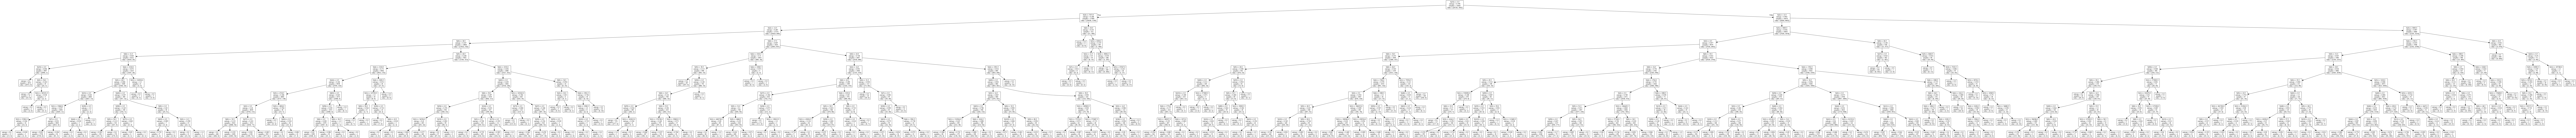

In [43]:
#Testing dengan algoritma Decision Tree, metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn import tree
import pandas as pd
from sklearn.externals import joblib
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import graphviz
from graphviz import Source
from IPython.display import SVG
from statistics import mode

#PEMBACAAN DATASET CENSUS UNTUK TESTING
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.test.txt', sep=",\s",na_values=["?"],header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"], engine='python')

#add & uncomment these two if you want to ignore the ? value
#, na_values=["?"]

#changing missing value into mode
cen["workclass"]=cen["workclass"].fillna(mode(cen["workclass"]))
cen["education"]=cen["education"].fillna(mode(cen["education"]))
cen["marital-status"]=cen["marital-status"].fillna(mode(cen["marital-status"]))
cen["occupation"]=cen["occupation"].fillna(mode(cen["occupation"]))
cen["relationship"]=cen["relationship"].fillna(mode(cen["relationship"]))
cen["race"]=cen["race"].fillna(mode(cen["race"]))
cen["sex"]=cen["sex"].fillna(mode(cen["sex"]))
cen["native-country"]=cen["native-country"].fillna(mode(cen["native-country"]))


census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]




#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == "<=50K."):
        new.append(0.0)
    else:
        if(item == ">50K."):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            

new_data = pd.get_dummies(census_data)


#Fixing unbalanced column problem
list_target = (list(new_data.columns.values))

empty_list = (list(set(list_census) - set(list_target)))

while (len(empty_list) > 0):
    new_data[empty_list.pop()] = 0

new_data = new_data.values
print("new_data:\n")
print(new_data)
clf = joblib.load('clf.pkl') # membaca model dari file eksternal
print('\nModel Loaded!')



#predicting learning data 
prediction = clf.predict(new_data)
print('PREDICTION: ',prediction)
print('\n\nTARGET TEST : ',new)

#lihat akurasi
print('\nAccuracy:')
acc = accuracy_score(new,prediction)
print(acc*100,'%')

graph = Source( tree.export_graphviz(clf, out_file=None))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)